<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/03_FashionMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Get the best results on the [fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset!

> "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">


TASK - Challenge: Get the best results on the fashionMNIST dataset!

The challenge of this task is to get the best results on the fashionMNIST dataset by tuning hyperparameters of the model and observing convergence behavior.

"Best" - for simplicity - means the highest accuracy on the validation set.

"Rules":

    You can change any hyperparameters,
    including the number of layers,
    width of the layers,
    activation functions,
    regularizers (and their parameters),
    optimizer (and it's parameters), but
    you should not change the model architecture, use only fully connected layers! (Even if you know any others... :-P

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

And: You may NOT manipulate the validation set! :-P

Happy coding! :-)


# Loading the data

In [1]:
import tensorflow as tf

(train_images, train_labels), (valid_test_images, valid_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# because of some limitations of Keras's softmax implementation, it's
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

valid_test_images = valid_test_images / 255. # the same normalization for valid and test

valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]

print(train_images.shape, valid_images.shape, test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


The classes are:
0.   T-shirt/top
1.   Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the first few training images:

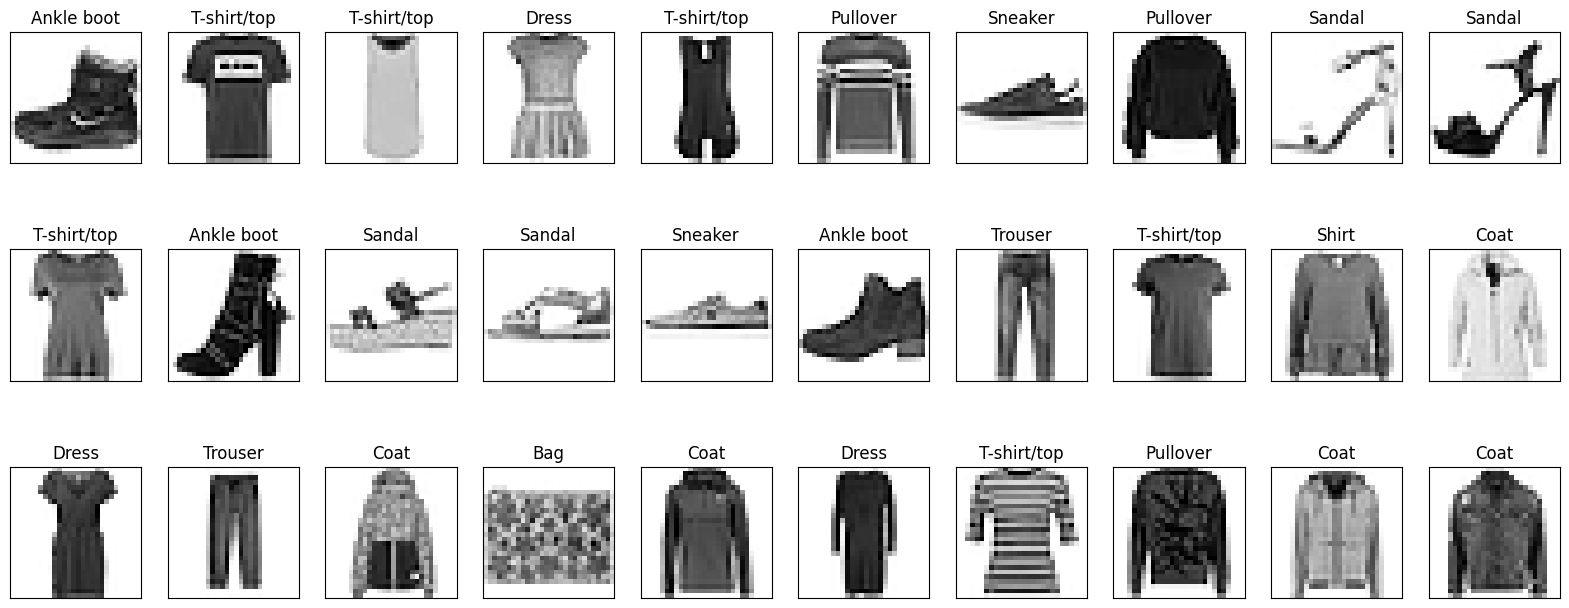

In [3]:
from matplotlib import pyplot as plt
from math import ceil

def show_images(images, labels):
    """Show images in a grid
    """
    n_rows = ceil(len(images) / 10)
    plt.figure(figsize=(20, 8))
    for i, image in enumerate(images):
        ax = plt.subplot(n_rows, 10, i + 1, xticks=[], yticks=[])
        # below we scale the pixel intensities back to display the images correctly
        plt.imshow(image, cmap='Greys')
        plt.title(classes[labels[i]])

show_images(train_images[:30], train_labels[:30])
plt.show();

Transform images with size of 22x22 to array of 784, so it can be used as input of the network

In [4]:
def reshape(images):
    images = images.reshape(images.shape[0], -1)
    return images

train_images = reshape(train_images)
valid_images = reshape(valid_images)
test_images = reshape(test_images)

print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 784) (5000, 784) (5000, 784)


# Model

We set the random seeds to get (as far as possible) reproducible results:

In [5]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
import tensorflow as tf

seed(14)
tf.random.set_seed(19)

## Network

In [6]:
# TODO: Try different models with different number of hidden layer


In [8]:
import tensorflow as tf

def create_model(hidden_layers):
    """
    Creates a sequential model with a specified number of hidden layers.

    Args:
        hidden_layers: A list of integers, where each integer represents
                       the number of neurons in a hidden layer.
                       For example, [64, 32] creates two hidden layers
                       with 64 and 32 neurons, respectively.

    Returns:
        A compiled Keras sequential model.
    """

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))  # Input layer for 784 features (28x28 images)

    # Add hidden layers based on the input list
    for neurons in hidden_layers:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 classes (clothing items)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage: Create and train models with different hidden layer configurations
for hidden_layers in [[64], [128], [64, 32], [128, 64]]:
    print(f"Training model with hidden layers: {hidden_layers}")
    model = create_model(hidden_layers)
    model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))
    # ... (Further evaluation and saving of the best model)

Training model with hidden layers: [64]
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7663 - loss: 0.6815 - val_accuracy: 0.8414 - val_loss: 0.4442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8560 - loss: 0.4005 - val_accuracy: 0.8524 - val_loss: 0.4081
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.3582 - val_accuracy: 0.8558 - val_loss: 0.3941
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8802 - loss: 0.3317 - val_accuracy: 0.8626 - val_loss: 0.3789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8870 - loss: 0.3128 - val_accuracy: 0.8614 - val_loss: 0.3711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8933 - loss: 0.2975 - val_accuracy: 0.8664 - val_loss: 0.3656
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8958 - loss: 0.2850 - val_accuracy: 0.8686 - val_loss: 0.3688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/s

In [18]:
import tensorflow as tf

def create_model(hidden_layers):
    """
    Creates a sequential model with a specified number of hidden layers.

    Args:
        hidden_layers: A list of integers, where each integer represents
                       the number of neurons in a hidden layer.
                       For example, [64, 32] creates two hidden layers
                       with 64 and 32 neurons, respectively.

    Returns:
        A compiled Keras sequential model.
    """

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))  # Input layer for 784 features (28x28 images)

    # Add hidden layers based on the input list
    for neurons in hidden_layers:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 classes (clothing items)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage: Create and train models with different hidden layer configurations
for hidden_layers in [[64], [128], [64, 32]]:
    print(f"Training model with hidden layers: {hidden_layers}")
    model = create_model(hidden_layers)
    model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))
    # ... (Further evaluation and saving of the best model)

Training model with hidden layers: [64]
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7728 - loss: 0.6692 - val_accuracy: 0.8368 - val_loss: 0.4476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8553 - loss: 0.4053 - val_accuracy: 0.8480 - val_loss: 0.4140
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8702 - loss: 0.3629 - val_accuracy: 0.8518 - val_loss: 0.3976
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8786 - loss: 0.3354 - val_accuracy: 0.8552 - val_loss: 0.3906
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8848 - loss: 0.3164 - val_accuracy: 0.8640 - val_loss: 0.3735
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8898 - loss: 0.3002 - val_accuracy: 0.8656 - val_loss: 0.3755
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8938 - loss: 0.2873 - val_accuracy: 0.8706 - val_loss: 0.3641
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/s

## Loss, optimization and compilation

In [19]:
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Loss
loss = sparse_categorical_crossentropy # we use this cross entropy variant as the input is not
                                       # one-hot encoded

# Optimizer
optimizer = Adam() # A "smart" SGD variant

# Compilation
#############
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Training

In [ ]:
# TODO: Train the model

In [20]:
history = model.fit(
    train_images,
    train_labels,
    epochs=25,  # Number of training iterations over the entire dataset
    validation_data=(valid_images, valid_labels) # Data for monitoring performance
)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9115 - loss: 0.2399 - val_accuracy: 0.8774 - val_loss: 0.3645
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9137 - loss: 0.2325 - val_accuracy: 0.8764 - val_loss: 0.3744
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9162 - loss: 0.2275 - val_accuracy: 0.8736 - val_loss: 0.3834
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9179 - loss: 0.2211 - val_accuracy: 0.8756 - val_loss: 0.3957
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.2154 - val_accuracy: 0.8726 - val_loss: 0.4159
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9200 - loss: 0.2119 - val_accuracy: 0.8712 - val_loss: 0.4069
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2082 - val_accuracy: 0.8738 - val_loss: 0.4115
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9215 - loss: 0.2064 - 

In [ ]:
# TODO: Plot loss and accuracy

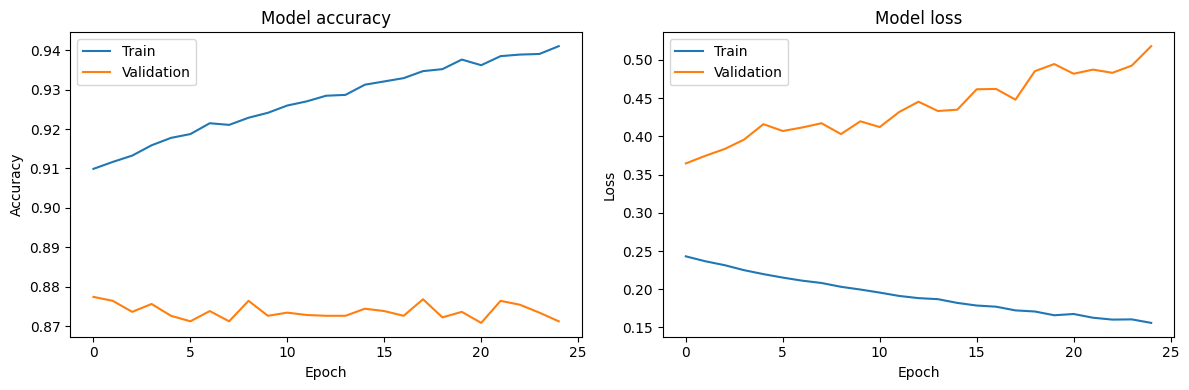

In [22]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Training model with hidden layers: [64]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3579 - loss: 1.9755 - val_accuracy: 0.6698 - val_loss: 1.2004
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6888 - loss: 1.0867 - val_accuracy: 0.7290 - val_loss: 0.9007
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7358 - loss: 0.8498 - val_accuracy: 0.7498 - val_loss: 0.7815
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7615 - loss: 0.7461 - val_accuracy: 0.7712 - val_loss: 0.7141
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7807 - loss: 0.6849 - val_accuracy: 0.7840 - val_loss: 0.6696
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7942 - loss: 0.6437 - val_accuracy: 0.7954 - val_loss: 0.6382
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8019 - loss: 0.6139 - val_accuracy: 0.8026 - val_loss: 0.6142
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms

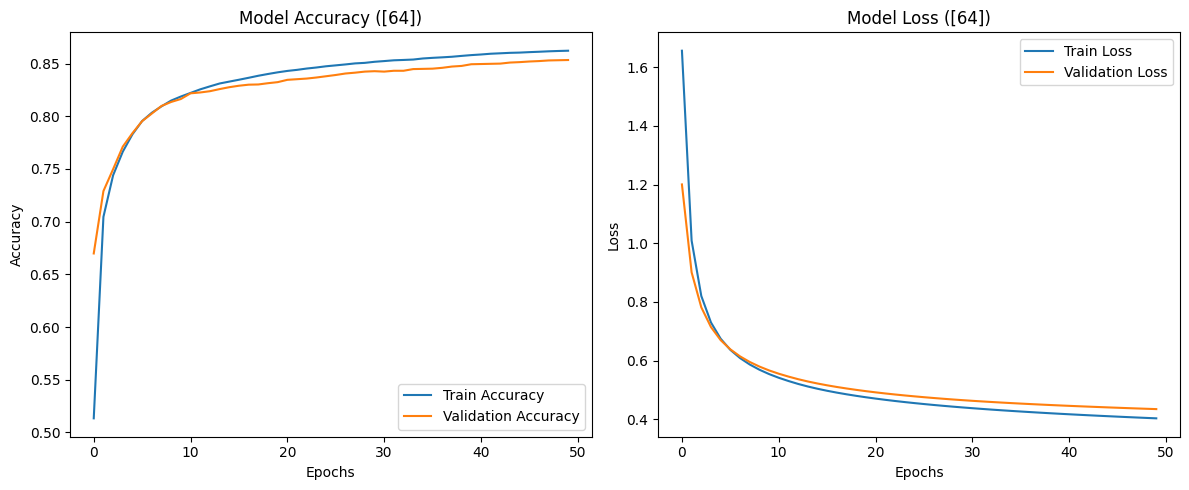

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.4197
Validation Loss: 0.4344039559364319, Validation Accuracy: 0.8533999919891357

Training model with hidden layers: [128]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3912 - loss: 1.9024 - val_accuracy: 0.6842 - val_loss: 1.0160
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7056 - loss: 0.9258 - val_accuracy: 0.7484 - val_loss: 0.7821
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7610 - loss: 0.7405 - val_accuracy: 0.7752 - val_loss: 0.6898
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7855 - loss: 0.6603 - val_accuracy: 0.7918 - val_loss: 0.6369
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8014 - loss: 0.6123 - val_accuracy: 0.8020 - val_loss: 0.6026
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8117 - loss: 0.5800 - val_accuracy: 0.8084 - val_loss: 0.5780
Epoch 7/50
1875/1875 ━━━

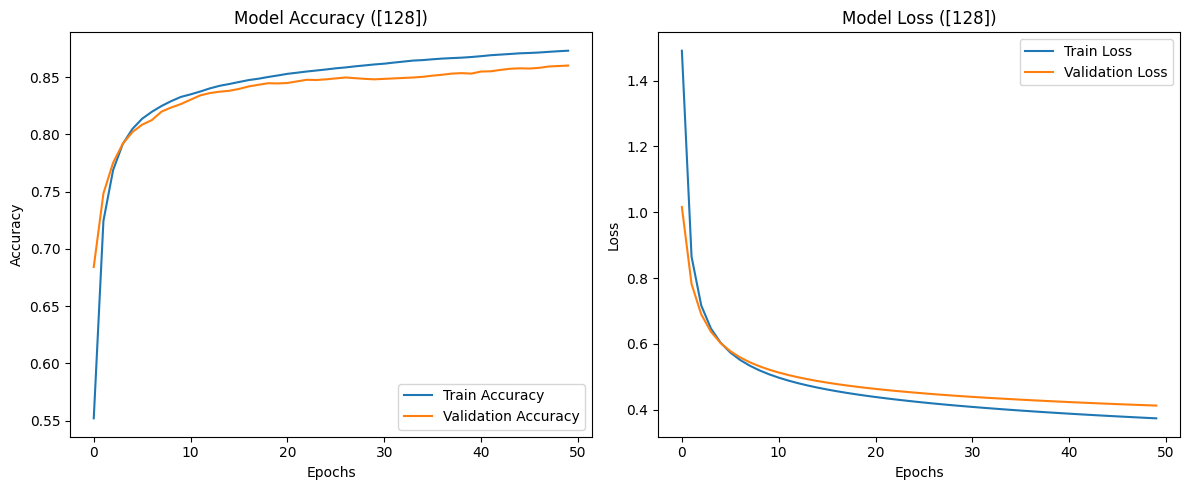

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3973
Validation Loss: 0.4125826060771942, Validation Accuracy: 0.8600000143051147

Training model with hidden layers: [64, 32]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3380 - loss: 1.9823 - val_accuracy: 0.6144 - val_loss: 1.2042
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6625 - loss: 1.0777 - val_accuracy: 0.7120 - val_loss: 0.8845
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7283 - loss: 0.8300 - val_accuracy: 0.7460 - val_loss: 0.7605
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7602 - loss: 0.7241 - val_accuracy: 0.7698 - val_loss: 0.6912
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7807 - loss: 0.6607 - val_accuracy: 0.7868 - val_loss: 0.6466
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7941 - loss: 0.6188 - val_accuracy: 0.7996 - val_loss: 0.6150
Epoch 7/50
1875/1875 ━━

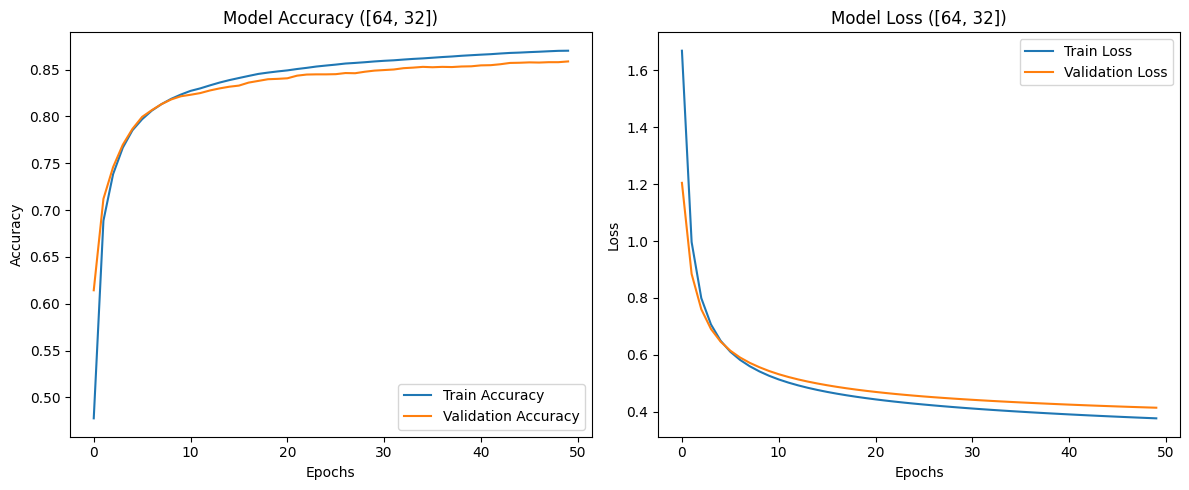

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8665 - loss: 0.4020
Validation Loss: 0.4148162603378296, Validation Accuracy: 0.8587999939918518

Training model with hidden layers: [128, 64]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4251 - loss: 1.8574 - val_accuracy: 0.6900 - val_loss: 0.9890
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7165 - loss: 0.8948 - val_accuracy: 0.7530 - val_loss: 0.7497
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7664 - loss: 0.7109 - val_accuracy: 0.7836 - val_loss: 0.6596
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7943 - loss: 0.6317 - val_accuracy: 0.7960 - val_loss: 0.6072
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8083 - loss: 0.5836 - val_accuracy: 0.8080 - val_loss: 0.5720
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8183 - loss: 0.5499 - val_accuracy: 0.8180 - val_loss: 0.5466
Epoch 7/50
1875/1875

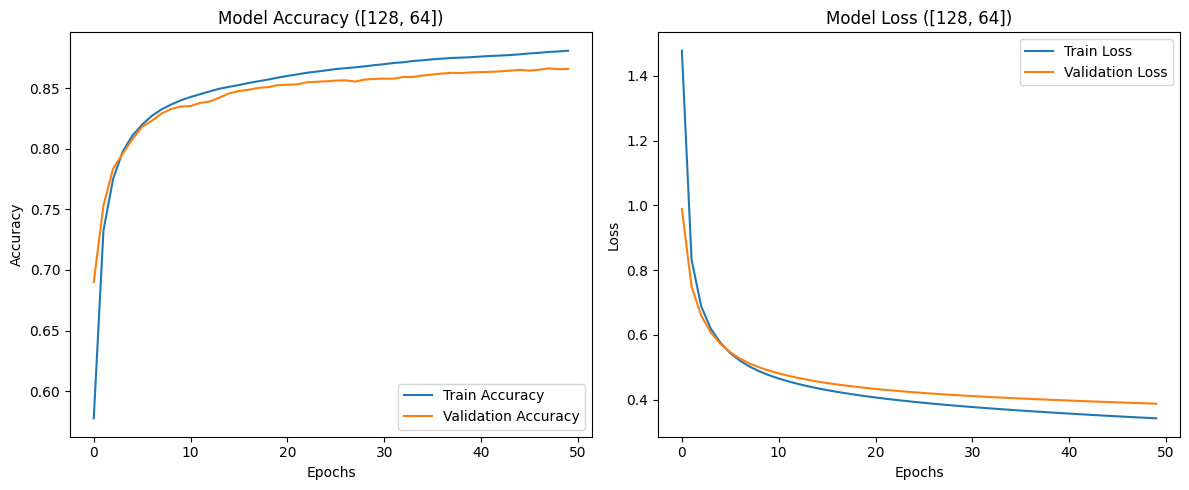

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3730
Validation Loss: 0.38789498805999756, Validation Accuracy: 0.8658000230789185


In [42]:
import tensorflow as tf

def create_model(hidden_layers):
    """
    Creates a sequential model with a specified number of hidden layers.

    Args:
        hidden_layers: A list of integers, where each integer represents
                       the number of neurons in a hidden layer.
                       For example, [64, 32] creates two hidden layers
                       with 64 and 32 neurons, respectively.

    Returns:
        A compiled Keras sequential model.
    """

    # Initialize the model
    model = tf.keras.models.Sequential()

    # Input layer for 784 features (e.g., 28x28 images flattened)
    model.add(tf.keras.layers.Input(shape=(784,)))

    # Add hidden layers based on the input list
    for neurons in hidden_layers:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))  # Hidden layers with ReLU activation

    # Output layer with 10 classes and softmax activation for multi-class classification
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Specify learning rate
                  loss='sparse_categorical_crossentropy',  # Loss for multi-class classification
                  metrics=['accuracy'])  # Track accuracy during training

    return model


for hidden_layers in [[64], [128], [64, 32], [128, 64]]:
    print(f"\nTraining model with hidden layers: {hidden_layers}")
    model = create_model(hidden_layers)

    # Add Early Stopping to avoid overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,  # Stop training after 5 epochs without improvement
        restore_best_weights=True  # Restore the best model weights
    )

    # Train the model
    history = model.fit(
        train_images, train_labels,  # Training data
        epochs=50,  # Max epochs
        batch_size=32,  # Batch size
        validation_data=(valid_images, valid_labels),  # Validation data
        callbacks=[early_stopping]  # Include early stopping callback
    )

    # Plot the training performance (optional)
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy ({hidden_layers})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss ({hidden_layers})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate model performance on the validation dataset
    test_loss, test_accuracy = model.evaluate(valid_images, valid_labels)
    print(f"Validation Loss: {test_loss}, Validation Accuracy: {test_accuracy}")


In [43]:
assert max(history.history['accuracy'])>0.72
assert max(history.history['val_accuracy'])>0.73

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


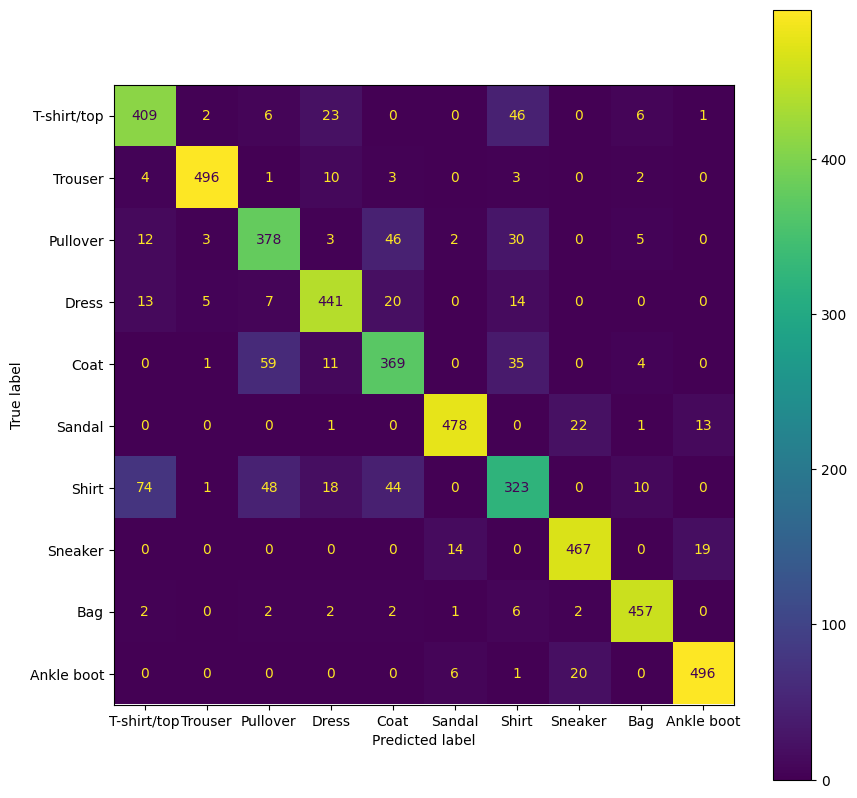

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       493
           1       0.99      0.96      0.97       519
           2       0.72      0.87      0.79       479
           3       0.80      0.93      0.86       500
           4       0.85      0.68      0.75       479
           5       0.96      0.95      0.96       515
           6       0.72      0.66      0.69       518
           7       0.91      0.95      0.93       500
           8       0.96      0.97      0.96       474
           9       0.96      0.93      0.94       523

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



## Training Performance


Training model with hidden layers: [64]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7711 - loss: 0.6558 - val_accuracy: 0.8348 - val_loss: 0.4503
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8555 - loss: 0.4051 - val_accuracy: 0.8430 - val_loss: 0.4215
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8685 - loss: 0.3670 - val_accuracy: 0.8538 - val_loss: 0.3999
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8760 - loss: 0.3439 - val_accuracy: 0.8602 - val_loss: 0.3857
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8814 - loss: 0.3260 - val_accuracy: 0.8628 - val_loss: 0.3804
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8877 - loss: 0.3122 - val_accuracy: 0.8646 - val_loss: 0.3696
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8909 - loss: 0.3007 - val_accuracy: 0.8672 - val_loss: 0.3691
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms

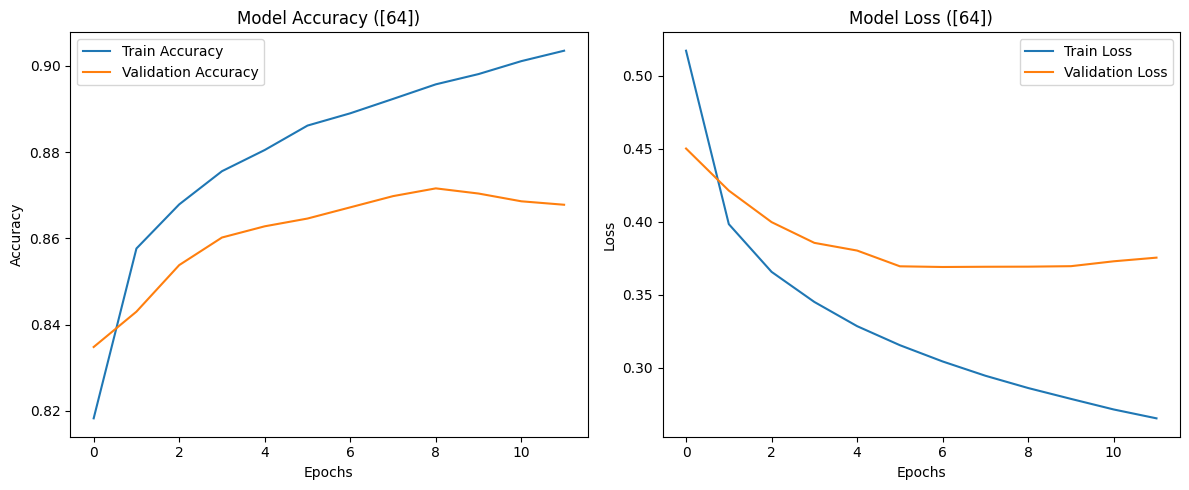

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.3557
Validation Loss: 0.3691462576389313, Validation Accuracy: 0.8672000169754028

Training model with hidden layers: [32]
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7583 - loss: 0.7056 - val_accuracy: 0.8170 - val_loss: 0.4784
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8507 - loss: 0.4224 - val_accuracy: 0.8340 - val_loss: 0.4437
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8648 - loss: 0.3834 - val_accuracy: 0.8500 - val_loss: 0.4086
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.3600 - val_accuracy: 0.8536 - val_loss: 0.3987
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.3435 - val_accuracy: 0.8536 - val_loss: 0.3975
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8803 - loss: 0.3313 - val_accuracy: 0.8580 - val_loss: 0.3916
Epoch 7/50
1875/1875 ━━━━━━

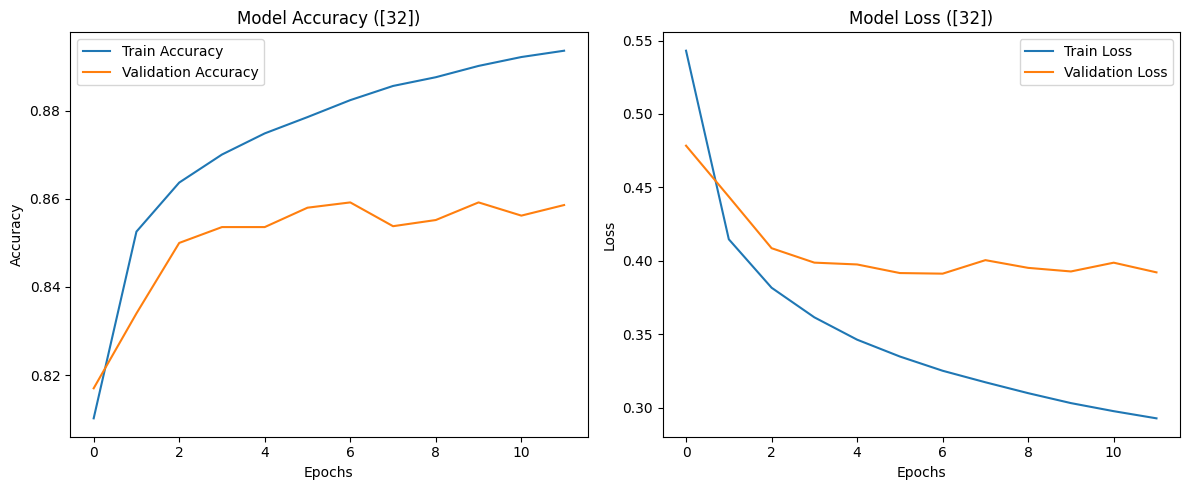

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3790
Validation Loss: 0.391232967376709, Validation Accuracy: 0.8592000007629395


In [38]:
import tensorflow as tf

def create_model(hidden_layers):
    """
    Creates a sequential model with a specified number of hidden layers.

    Args:
        hidden_layers: A list of integers, where each integer represents
                       the number of neurons in a hidden layer.
                       For example, [64, 32] creates two hidden layers
                       with 64 and 32 neurons, respectively.

    Returns:
        A compiled Keras sequential model.
    """

    # Initialize the model
    model = tf.keras.models.Sequential()

    # Input layer for 784 features (e.g., 28x28 images flattened)
    model.add(tf.keras.layers.Input(shape=(784,)))

    # Add hidden layers based on the input list
    for neurons in hidden_layers:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))  # Hidden layers with ReLU activation

    # Output layer with 10 classes and softmax activation for multi-class classification
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile the model with Nesterov optimizer
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),  # Nesterov optimizer
                  loss='sparse_categorical_crossentropy',  # Loss for multi-class classification
                  metrics=['accuracy'])  # Track accuracy during training

    return model


# Reduced number of hidden layers
for hidden_layers in [[64], [32]]:
    print(f"\nTraining model with hidden layers: {hidden_layers}")
    model = create_model(hidden_layers)

    # Add Early Stopping to avoid overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,  # Stop training after 5 epochs without improvement
        restore_best_weights=True  # Restore the best model weights
    )

    # Train the model
    history = model.fit(
        train_images, train_labels,  # Training data
        epochs=50,  # Max epochs
        batch_size=32,  # Batch size
        validation_data=(valid_images, valid_labels),  # Validation data
        callbacks=[early_stopping]  # Include early stopping callback
    )

    # Plot the training performance
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy ({hidden_layers})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss ({hidden_layers})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate model performance on the validation dataset
    test_loss, test_accuracy = model.evaluate(valid_images, valid_labels)
    print(f"Validation Loss: {test_loss}, Validation Accuracy: {test_accuracy}")


## Quality Check

In [39]:
assert max(history.history['accuracy'])>0.72
assert max(history.history['val_accuracy'])>0.73

## Visualization

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


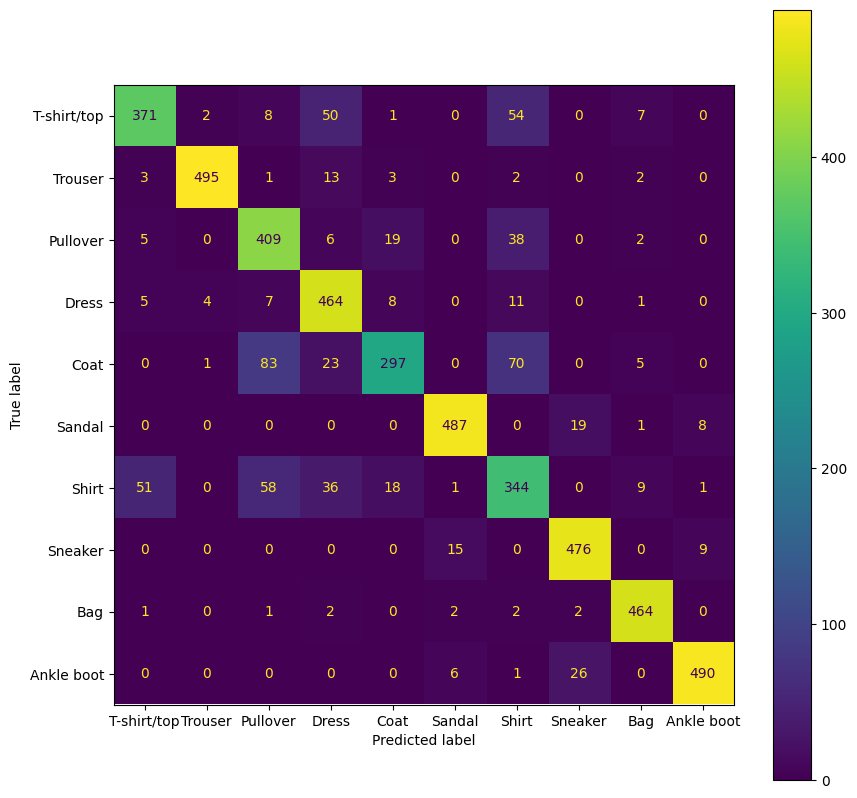

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       493
           1       0.99      0.95      0.97       519
           2       0.72      0.85      0.78       479
           3       0.78      0.93      0.85       500
           4       0.86      0.62      0.72       479
           5       0.95      0.95      0.95       515
           6       0.66      0.66      0.66       518
           7       0.91      0.95      0.93       500
           8       0.95      0.98      0.96       474
           9       0.96      0.94      0.95       523

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



## Saving the model

In [30]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'